In [1]:
# import require library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 50)
# pd.set_printoptions(precision=2)
pd.set_option('display.precision', 3)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
#show top 5 rows
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [6]:
#fetching the last 5 data
data.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [7]:
# check data's dimension
data.shape

(1000, 8)

In [8]:
#checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data['gender'].dtypes

dtype('O')

In [10]:
data['gender'].dtypes=='O'

True

In [11]:
#show column names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
# get ctegorical column
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

In [13]:
display(cat_col)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
data_cat = data[cat_col]
data_cat.head(2)

gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test preparation course  
0                    none  
1               completed

In [15]:
# get numerical column
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [16]:
display(num_col)

['math score', 'reading score', 'writing score']

In [17]:
data_num = data[num_col]
data_num.head(2)

math score  reading score  writing score
0          72             72             74
1          69             90             88

In [18]:
#for memory checking
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Missing value

In [19]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
data.isnull().sum().sum()

0

In [21]:
#for duplicate value
data.duplicated().sum()

0

In [22]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [24]:
data.describe()

math score  reading score  writing score
count    1000.000       1000.000       1000.000
mean       66.089         69.169         68.054
std        15.163         14.600         15.196
min         0.000         17.000         10.000
25%        57.000         59.000         57.750
50%        66.000         70.000         69.000
75%        77.000         79.000         79.000
max       100.000        100.000        100.000

In [25]:
#for tanspose function
data.describe().T

count    mean     std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.196  10.0  57.75  69.0  79.0  100.0

In [26]:
data.corr()

math score  reading score  writing score
math score          1.000          0.818          0.803
reading score       0.818          1.000          0.955
writing score       0.803          0.955          1.000

In [27]:
# skewness
data.skew()

math score      -0.279
reading score   -0.259
writing score   -0.289
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

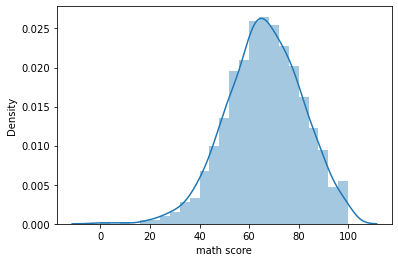

In [28]:
sns.distplot(data['math score'])

In [29]:
#for finding the averarge
#data['Avarge']=(data['math score']+data['reading score']+data['writing score'])/3
data['Avarge'] = round((data['reading score'] + data['writing score'] + data['math score']) / 3, 2)

In [30]:
def Grade(percentage):
    if percentage >= 95: return "O"
    if percentage > 81 : return "A"
    if percentage > 71 : return "B"
    if percentage > 61 : return "C"
    if percentage > 51 : return "D"
    if percentage > 41 : return "E"
    else: return "F"

data["Grade"] = data['Avarge'].apply(lambda x: Grade(x))

In [31]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  Avarge  \
0                    none          72             72             74   72.67   
1               completed          69             90             88   82.33   
2                    none          90             95             93   92.67   
3                    none          47             57             44   49.33   
4                    none          76             78             75   76.33   

  Grade  
0     B  
1     A  
2     A  
3     E  
4     B

In [32]:
#Group by Operations
data.groupby('gender').mean()

math score  reading score  writing score  Avarge
gender                                                  
female      63.633         72.608         72.467  69.569
male        68.728         65.473         63.311  65.837

In [33]:
data.groupby('gender').count()

race/ethnicity  parental level of education  lunch  \
gender                                                       
female             518                          518    518   
male               482                          482    482   

        test preparation course  math score  reading score  writing score  \
gender                                                                      
female                      518         518            518            518   
male                        482         482            482            482   

        Avarge  Grade  
gender                 
female     518    518  
male       482    482

In [34]:
#question:-To find out no of student whoever is having less than 30 marks math

In [35]:
data[data["math score"] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarge                         14
Grade                          14
dtype: int64

In [36]:
from scipy.stats import normaltest
normaltest(data_num["math score"])[1]*100

0.04508029386993784

### if p>0.05 then my data will be normally distributed

<AxesSubplot:xlabel='math score', ylabel='Density'>

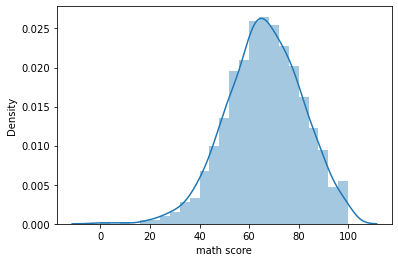

In [37]:
sns.distplot(data_num['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

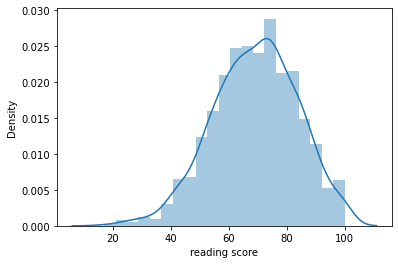

In [38]:
sns.distplot(data_num['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

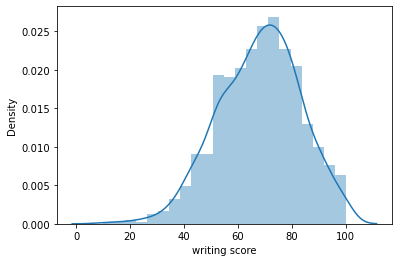

In [39]:
sns.distplot(data_num['writing score'])

<AxesSubplot:xlabel='Avarge', ylabel='Density'>

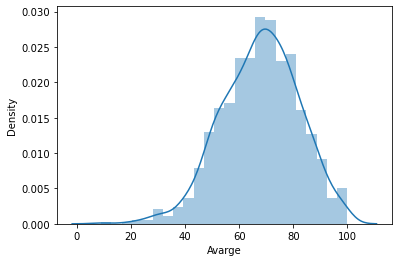

In [40]:
sns.distplot(data['Avarge'])

In [41]:
#outlier

<AxesSubplot:>

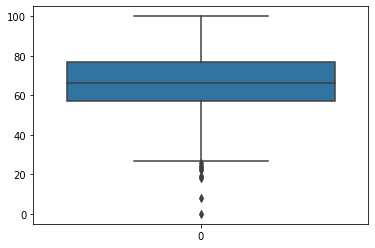

In [42]:
sns.boxplot(data=data['math score'])

<AxesSubplot:>

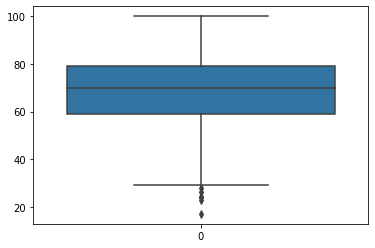

In [43]:
sns.boxplot(data=data['reading score'])

In [44]:
q1=data['math score'].quantile(0.25)

In [45]:
q3=data['math score'].quantile(0.75)

In [46]:
IQR=q3-q1

In [47]:
upper_limit=q3+(1.5*IQR)
print('upper_limit=',upper_limit)

upper_limit= 107.0


In [48]:
lower_limit=q1-(1.5*IQR)
print('lower_limit=',lower_limit)

lower_limit= 27.0


In [49]:
data_outlier=data[data['math score']<lower_limit]

In [50]:
data_num.drop(data_outlier.index)

math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[992 rows x 3 columns]

In [51]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  Avarge  \
0                    none          72             72             74   72.67   
1               completed          69             90             88   82.33   
2                    none          90             95             93   92.67   
3                    none          47             57             44   49.33   
4                    none          76             78             75   76.33   

  Grade  
0     B  
1     A  
2     A  
3     E  
4     B

In [52]:
data[data['math score']>upper_limit]

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, Avarge, Grade]
Index: []

In [53]:
data['math score'].quantile(1.00)

100.0

In [54]:
print('math maximum number ',data['math score'].max() )
print('math minimum number ',data['math score'].min() )

math maximum number  100
math minimum number  0


In [55]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [56]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence

In [57]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [58]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [59]:
replace_with_threshold(data_num,data_num.columns)

In [60]:
data

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  Avarge  \
0                      none          72             72             74   72.67   
1                 completed          69             90             88   82.33   
2                      none          90             95             93   92.67   
3                      none          47             57             44   49.33   
4                      none          76             78             75   76.33   
..                      ...         ...            ...            ...     ...   
995               completed          88             99             95   94.00   
996                    none          62             55             55   57.33   
997               completed          59             71             65   65.00   
998               completed          68             78             77   74.33   
999                    none          77             86             86   83.00   

    Grade  
0       B  
1       A  
2       A  
3       E  
4       B  
..    ...  
995     A  
996     D  
997     C  
998     B  
999     A  

[1000 rows x 10 columns]

In [61]:
data_num.loc[data_num['math score']<lower_limit,'math score']

Series([], Name: math score, dtype: int64)

In [62]:
data_num.loc[data_num['math score']<lower_limit,'math score']=lower_limit

In [63]:
data_num

math score  reading score  writing score
0            72             72           74.0
1            69             90           88.0
2            90             95           93.0
3            47             57           44.0
4            76             78           75.0
..          ...            ...            ...
995          88             99           95.0
996          62             55           55.0
997          59             71           65.0
998          68             78           77.0
999          77             86           86.0

[1000 rows x 3 columns]

In [64]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5*(iqr)
    uppeer_fence=q3+1.5*(iqr)
    if remove_or_fill_with_quartile=="drop":
        df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
        df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
    elif remove_or_fill_with_quartile=="fill":
        df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
        df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])

## Graph analysis

In [65]:
data

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  Avarge  \
0                      none          72             72             74   72.67   
1                 completed          69             90             88   82.33   
2                      none          90             95             93   92.67   
3                      none          47             57             44   49.33   
4                      none          76             78             75   76.33   
..                      ...         ...            ...            ...     ...   
995               completed          88             99             95   94.00   
996                    none          62             55             55   57.33   
997               completed          59             71             65   65.00   
998               completed          68             78             77   74.33   
999                    none          77             86             86   83.00   

    Grade  
0       B  
1       A  
2       A  
3       E  
4       B  
..    ...  
995     A  
996     D  
997     C  
998     B  
999     A  

[1000 rows x 10 columns]

<AxesSubplot:xlabel='gender', ylabel='count'>

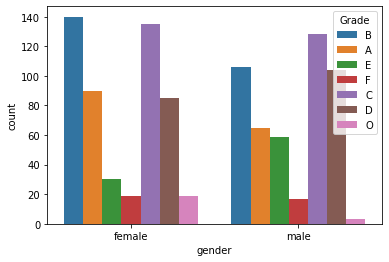

In [83]:
sns.countplot(x='gender', data=data, hue='Grade')

In [85]:
(data.groupby('gender'))['Grade'].count()

gender
female    518
male      482
Name: Grade, dtype: int64

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

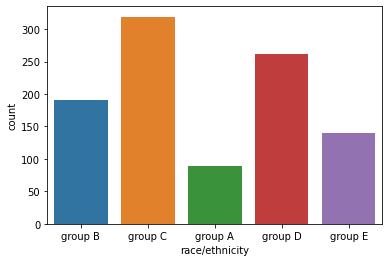

In [67]:
sns.countplot(data['race/ethnicity'])

In [68]:
df=data.groupby('gender').mean()
df

math score  reading score  writing score  Avarge
gender                                                  
female      63.633         72.608         72.467  69.569
male        68.728         65.473         63.311  65.837

In [69]:
female_score=df['Avarge'][0],df['math score'][0]

In [70]:
male_score=df['Avarge'][1],df['math score'][1]

In [71]:
display(female_score)
display(male_score)

(69.56949806949807, 63.633204633204635)

(65.83730290456432, 68.72821576763485)

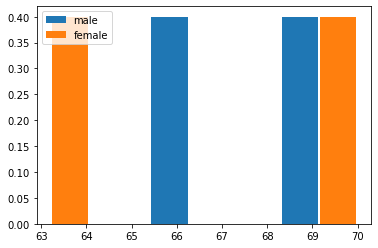

In [84]:
plt.bar(male_score,0.4,label='male')
plt.bar(female_score,0.4,label='female')
plt.legend()
plt.show()

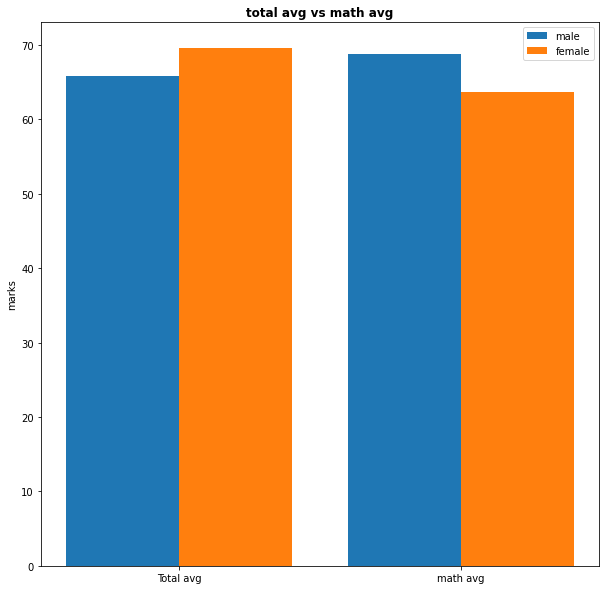

In [73]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['Avarge'][0],df['math score'][0]
male_score=df['Avarge'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')
plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [74]:
data_num.head()

math score  reading score  writing score
0          72             72           74.0
1          69             90           88.0
2          90             95           93.0
3          47             57           44.0
4          76             78           75.0

In [75]:
data_num.corr()

math score  reading score  writing score
math score          1.000          0.816          0.800
reading score       0.816          1.000          0.954
writing score       0.800          0.954          1.000

<AxesSubplot:>

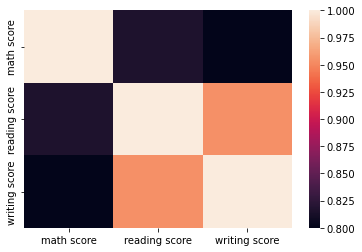

In [76]:
sns.heatmap(data_num.corr())

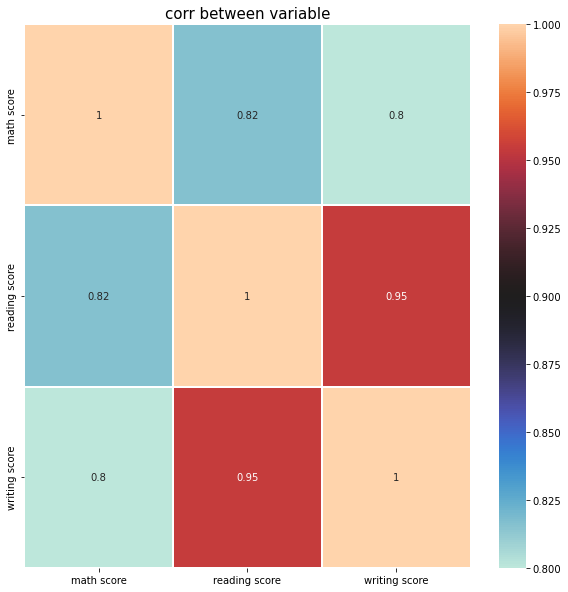

In [77]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

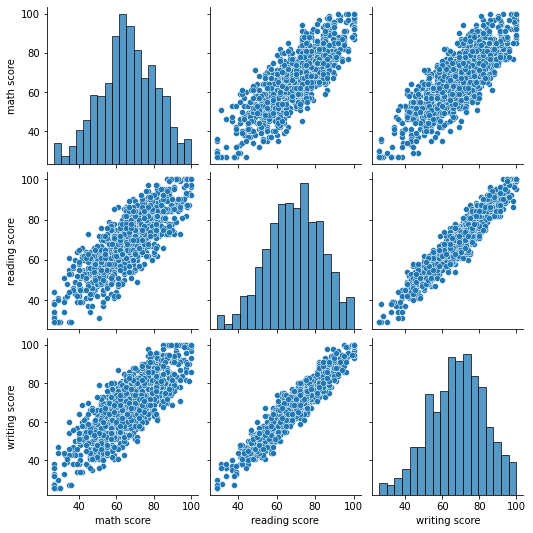

In [78]:
sns.pairplot(data_num)

<AxesSubplot:>

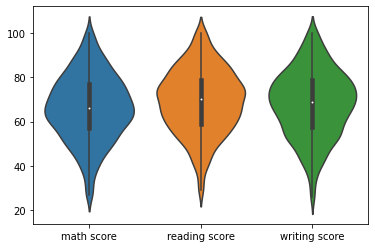

In [79]:
sns.violinplot(data=data_num)